In [1]:
from DataLoader import DataLoader
from Pipeline import Pipeline, Process

import Processes
import Filters
import Visualization

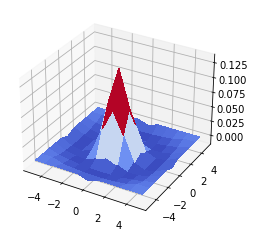

100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.20it/s]


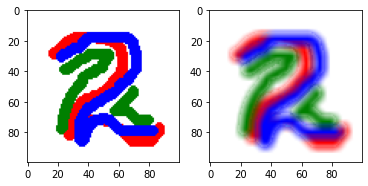

  0%|                                          | 2/2240 [00:03<58:15,  1.56s/it]


KeyboardInterrupt: 

In [2]:
input_path = 'data'
output_path = 'output'

F = Filters.make_difference_of_gaussian()
Visualization.filter_visualization(F)

dl = DataLoader(input_path, output_path)
pipe = Pipeline([
    #Processes.Filter(-F, parallel_method='row', workers=8), 
    Processes.BilateralFilter(7,20,20),
    Processes.NormalizeImage(), 
    #Processes.Reverse_Image()
])

for i, image in enumerate(dl):
    res = pipe.process(image)
    dl.write(i,res)
    Visualization.image_result_comparison(image, res)

In [ ]:

import cv2
 
# Read the image.
img = cv2.imread('data/malevich.jpg')
 
# Apply bilateral filter with d = 15,
# sigmaColor = sigmaSpace = 75.
bilateral = cv2.bilateralFilter(img, 50, 75, 75)
 
edges = cv2.Canny(image=bilateral, threshold1=100, threshold2=200)

# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
    
# Save the output.
cv2.imwrite('output/malevich.jpg', edges)